In [3]:
# pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.5.0-cp38-cp38-manylinux2010_x86_64.whl (454.4 MB)
     |████████████████████████████████| 57 kB 29 kB/s eta 0:00:0111
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 14.9 MB 164 kB/s ta 0:00:010
     |████████████████████████████████| 65 kB 692 kB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 138 kB/s eta 0:00:01
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
     |████████████████████████████████| 462 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 522 kB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
     |████████████████████████████████| 6.0 MB 619 kB/s ta 0:00:013
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached

In [53]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [54]:
datasets = pd.read_csv('./spam1.csv') 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.info())


Data :
        v1                                                 v2
0    spam  Free entry in 2 a wkly comp to win FA Cup fina...
1    spam  FreeMsg Hey there darling it's been 3 week's n...
2    spam  WINNER!! As a valued network customer you have...
3    spam  Had your mobile 11 months or more? U R entitle...
4    spam  SIX chances to win CASH! From 100 to 20,000 po...
..    ...                                                ...
508  spam  This is the 2nd time we have tried 2 contact u...
509   ham              Will �_ b going to esplanade fr home?
510   ham  Pity, * was in mood for that. So...any other s...
511   ham  The guy did some bitching but I acted like i'd...
512   ham                         Rofl. Its true to its name

[513 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      513 non-null    object
 1   v2      513 non-nu

##Analysis

To analyze the text data, we have to turn the words into numerical numbers. 
We have multiple choices to accomplish this step: 

1) Binary Term Frequency :  count presence(1) or absence(0) for term in document

2) Bag of Words Frequency:  captures the frequency of term in document

3) Term Frequency: 

4) TFIDF :

in this way, if a term appears frequently in a document, it’s important; if a term appears in many documents, it’s not a unique identifier.

Word2Vec.

In [55]:
datasets.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham    341    335                             Sorry, I'll call later    4
spam   172    168  Today's Offer! Claim ur �150 worth of discount...    2

#Next we use CountVectorizer:

More Details and example at:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
datasets.iloc[:,0] = le.fit_transform(datasets.iloc[:,0])
print(datasets.head)

X_train, X_test, Y_train, Y_test = train_test_split(datasets.iloc[:,1],
                        datasets.iloc[:,0], test_size = 0.25, random_state = 136)

v = CountVectorizer()
X_train_c = v.fit_transform(X_train.values)
X_train = X_train_c.toarray()

<bound method NDFrame.head of      v1                                                 v2
0     1  Free entry in 2 a wkly comp to win FA Cup fina...
1     1  FreeMsg Hey there darling it's been 3 week's n...
2     1  WINNER!! As a valued network customer you have...
3     1  Had your mobile 11 months or more? U R entitle...
4     1  SIX chances to win CASH! From 100 to 20,000 po...
..   ..                                                ...
508   1  This is the 2nd time we have tried 2 contact u...
509   0              Will �_ b going to esplanade fr home?
510   0  Pity, * was in mood for that. So...any other s...
511   0  The guy did some bitching but I acted like i'd...
512   0                         Rofl. Its true to its name

[513 rows x 2 columns]>


In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

**Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [59]:
X_t = v.transform(X_test).toarray()

predicted_data = nb.predict(X_t)
predicted_data

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [60]:
import numpy as np

np.array(Y_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [61]:
precision = precision_score(Y_test, predicted_data, average=None)
recall = recall_score(Y_test, predicted_data, average=None)

print("Accuracy: {}".format(metrics.accuracy_score(Y_test, predicted_data)))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.937984496124031
precision: [0.97590361 0.86956522]
recall: [0.93103448 0.95238095]


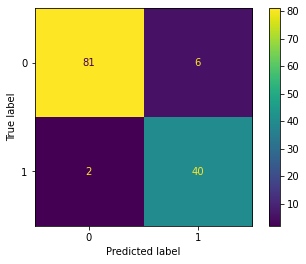

In [62]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(nb, X_t, Y_test)  
plt.show()

**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model = DecisionTreeClassifier(criterion='gini',max_depth=10)

model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

In [65]:
predicted_data = model.predict(X_t)
predicted_data

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [66]:
np.array(Y_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [67]:
precision = precision_score(Y_test, predicted_data, average=None)
recall = recall_score(Y_test, predicted_data, average=None)

print("Accuracy: {}".format(metrics.accuracy_score(Y_test, predicted_data)))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.9069767441860465
precision: [0.91208791 0.89473684]
recall: [0.95402299 0.80952381]


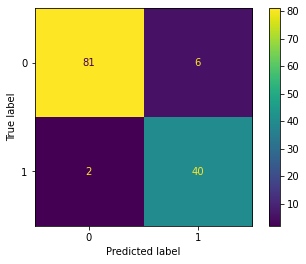

In [68]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(nb, X_t, Y_test)  
plt.show()

In [71]:
len(v.get_feature_names())

1884

**Optional Exercise:**
Try this on full spam.csv file and bigram matching instead of unigram matching 